<a href="https://colab.research.google.com/github/aayushdangol16/neuralNetwork/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classifying Fashion-MNIST**

In [1]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
import matplotlib.pyplot as plt
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 9707339.66it/s] 


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 174252.72it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3180559.61it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19755056.72it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [20]:
images,labels=next(iter(trainloader))

In [21]:
images.shape

torch.Size([64, 1, 28, 28])

In [22]:
images[0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -0.9922, -0.9843, -1.0000, -1.0000, -1.0000,  0.1373,  0.4510,
           0.3098,  0.4667,  0.3569, -1.0000, -1.0000, -1.0000, -0.9765,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9765,
          -1.0000, -1.0000, -1.0000, -1.0000, -0.5216,  0.6549,  0.2157,
           0.0431,  0.2000,  0.6078, -0.6000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.9843, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9922, -1.0000,
          -1.0000, -0.7255, -0.1529,  0.2314,  0.4588,  0.3255, -0.0275,
           0.3020,  0.1059,  0.3725,  0.3255,  0.2784, -0.1765, -0.8275,
          -1.0000, -1.0000, -0.9843, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.8980,
           0.0980,  0.2549,  0.2549,  0.1922,  0

In [23]:
labels.shape

torch.Size([64])

In [24]:
labels

tensor([6, 3, 7, 1, 7, 1, 9, 4, 7, 0, 7, 9, 7, 6, 8, 7, 6, 8, 9, 4, 7, 2, 8, 4,
        6, 0, 2, 8, 9, 2, 9, 8, 6, 6, 1, 3, 1, 7, 9, 4, 5, 7, 0, 8, 6, 8, 6, 6,
        5, 9, 8, 2, 7, 1, 8, 0, 3, 4, 1, 9, 7, 3, 8, 0])

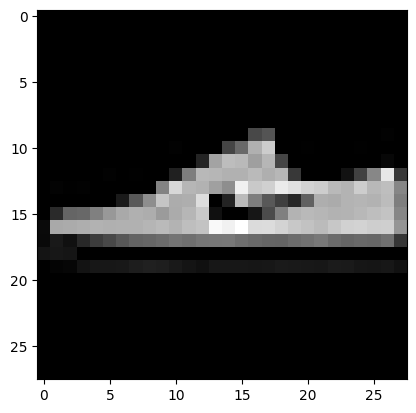

In [35]:
plt.imshow(images[15].view(28,28),cmap='gray')

In [37]:
model=nn.Sequential(nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Linear(256,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

In [41]:
epochs=5
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output=model(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}")

Training Loss: 0.2561200242847014
Training Loss: 0.2543906151358761
Training Loss: 0.2502777101690454
Training Loss: 0.24106941345149774
Training Loss: 0.2398139592339553


In [42]:
images,labels=next(iter(testloader))
img=images[0].view(1,784)
with torch.no_grad():
  logps=model(img)
ps=torch.exp(logps)

In [43]:
ps

tensor([[2.6625e-44, 5.8853e-31, 6.5541e-39, 2.9761e-30, 1.9173e-39, 1.5861e-13,
         1.6491e-33, 1.9009e-05, 2.6994e-21, 9.9998e-01]])

In [44]:
ps.shape

torch.Size([1, 10])

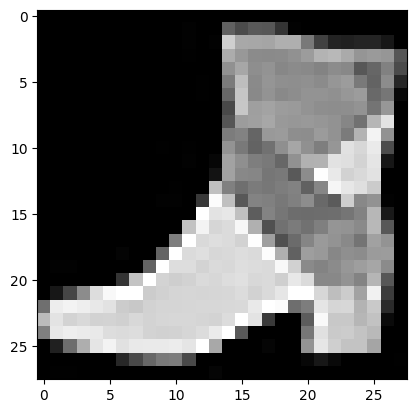

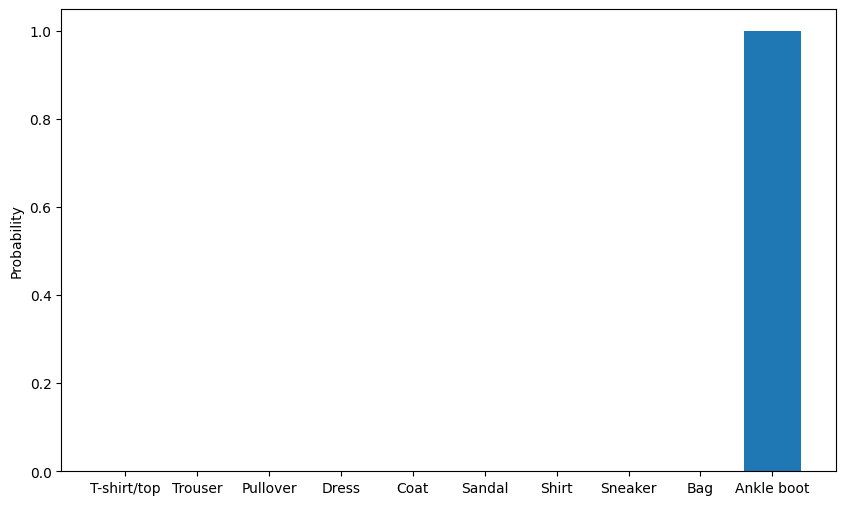

In [46]:
Class=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.imshow(images[0].view(28, 28), cmap='gray')
probabilities = ps.detach().numpy().squeeze()
plt.figure(figsize=(10, 6))
plt.bar(Class, probabilities)
plt.ylabel('Probability')
plt.show()